In [31]:
import pandas as pd

df1 = pd.read_csv('Agriculture_Data.csv')
df2 = pd.read_csv('Agriculture_Weather_Data.csv')


concated_df = pd.merge(df1,df2 ,on= 'Region', how= 'outer')

concated_df.to_csv('concated_data.csv', index=False)




In [ ]:
print(df1.info())
print(df2.info())


In [8]:
df3 = pd.read_csv('concated_data.csv')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37475 entries, 0 to 37474
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      37475 non-null  int64  
 1   Crop                37475 non-null  object 
 2   Quantity_Sold_Kg    37475 non-null  int64  
 3   Price_per_Kg_USD    37475 non-null  float64
 4   Region              37475 non-null  object 
 5   Sale_Date           37475 non-null  object 
 6   Weather_Station_ID  37475 non-null  int64  
 7   Temperature_C       37475 non-null  float64
 8   Rainfall_mm         37475 non-null  float64
 9   Observation_Date    37475 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.9+ MB


In [ ]:
# check for empty values
print(df3.isnull().sum())

# check for duplicates
print(df3.duplicated().sum())

# check for duplicates in a specific column
print(df3['Region'].duplicated().sum())

# drop duplicates
df3['Region'].drop_duplicates(inplace=True)
print(df3)

       Transaction_ID      Crop  Quantity_Sold_Kg  Price_per_Kg_USD Region  \
0                5179      Rice               720              1.04   West   
1                5179      Rice               720              1.04   West   
2                5179      Rice               720              1.04   West   
3                5179      Rice               720              1.04   West   
4                5179      Rice               720              1.04   West   
...               ...       ...               ...               ...    ...   
37470            5041  Potatoes               839              1.79   East   
37471            5041  Potatoes               839              1.79   East   
37472            5041  Potatoes               839              1.79   East   
37473            5041  Potatoes               839              1.79   East   
37474            5041  Potatoes               839              1.79   East   

       Sale_Date  Weather_Station_ID  Temperature_C  Rainfall_m

In [13]:
data_df = pd.read_csv('concated_data.csv')

data_df['Region'].describe()

count     37475
unique        4
top       North
freq      10780
Name: Region, dtype: object

In [9]:
crop_sales = df3.groupby('Crop')['Price_per_Kg_USD'].sum()

top_5_crops = crop_sales.sort_values(ascending=False).head(5)

print(top_5_crops)

Crop
Soybeans    22377.70
Potatoes    21270.63
Corn        21224.05
Rice        20530.85
Wheat       17621.56
Name: Price_per_Kg_USD, dtype: float64


In [ ]:
import pandas as pd

preferred_crops = df3.groupby('Region')['Crop'].value_counts().reset_index(name='Count')
preferred_crops = preferred_crops.sort_values('Count', ascending=False).drop_duplicates('Region')

print(preferred_crops.head())

   Region      Crop  Count
5   North      Corn   2772
0    East  Potatoes   2376
16   West  Potatoes   2160
10  South      Rice   2130


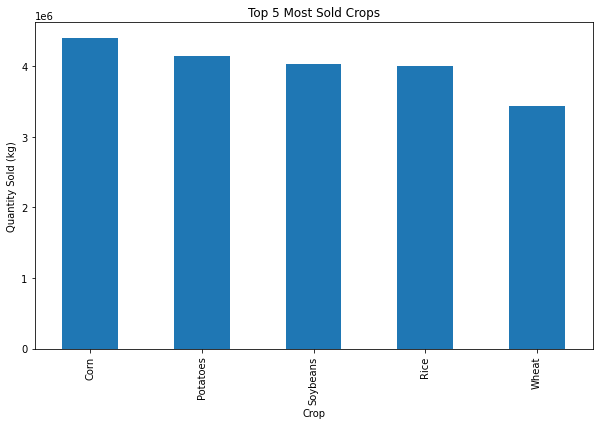

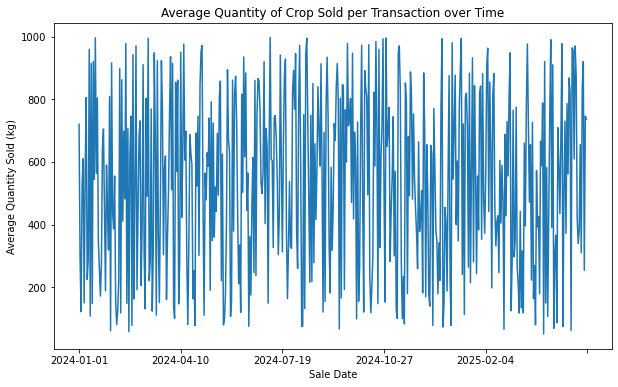

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('concated_data.csv')


crop_sales = data.groupby('Crop')['Quantity_Sold_Kg'].sum()

# Create a bar chart of the top 5 most sold crops
plt.figure(figsize=(10, 6))
crop_sales.nlargest(5).plot(kind='bar')
plt.title('Top 5 Most Sold Crops')
plt.xlabel('Crop')
plt.ylabel('Quantity Sold (kg)')
plt.show()

# Create a line chart of the average quantity of crop sold per transaction over time
plt.figure(figsize=(10, 6))
data.groupby('Sale_Date')['Quantity_Sold_Kg'].mean().plot(kind='line')
plt.title('Average Quantity of Crop Sold per Transaction over Time')
plt.xlabel('Sale Date')
plt.ylabel('Average Quantity Sold (kg)')
plt.show()


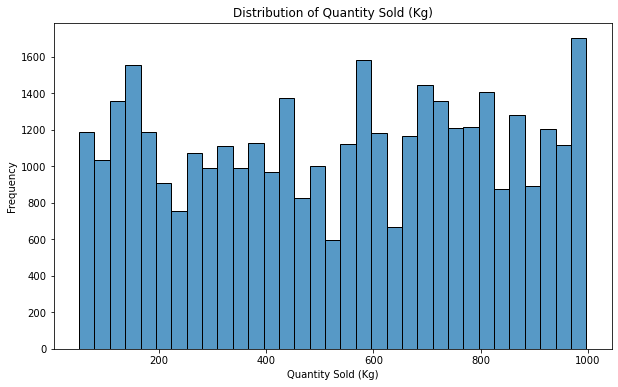

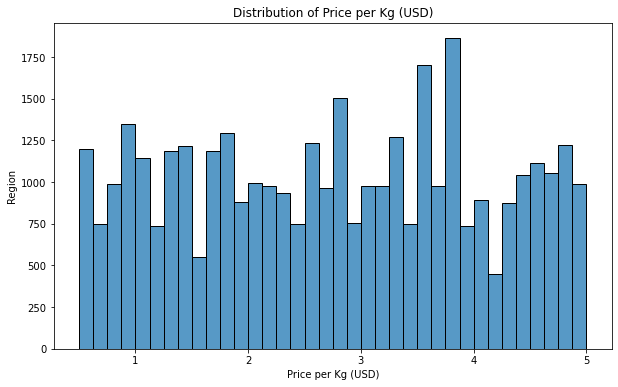

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df3 = pd.read_csv('concated_data.csv')

# Distribution of Quantity Sold (Kg)
plt.figure(figsize=(10, 6))
sns.histplot(df3['Quantity_Sold_Kg'])
plt.title('Distribution of Quantity Sold (Kg)')
plt.xlabel('Quantity Sold (Kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Price per Kg (USD)
plt.figure(figsize=(10, 6))
sns.histplot(df3['Price_per_Kg_USD'])
plt.title('Distribution of Price per Kg (USD)')
plt.xlabel('Price per Kg (USD)')
plt.ylabel('Region')
plt.show()

Corn        8147
Potatoes    7703
Soybeans    7539
Rice        7404
Wheat       6682
Name: Crop, dtype: int64


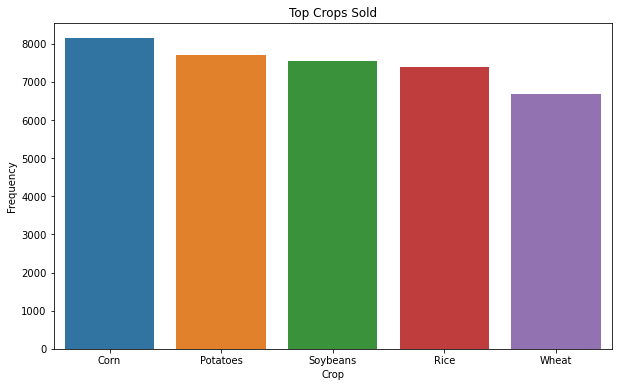

In [21]:
# Top Crops Sold
top_crops = df3['Crop'].value_counts().head(10)
print(top_crops)

# Bar chart of top crops sold
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops.index, y=top_crops.values)
plt.title('Top Crops Sold')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.show()

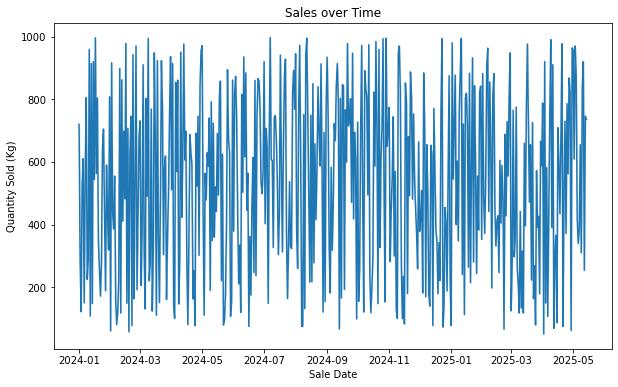

In [23]:
# Convert Sale_Date to datetime format
df3['Sale_Date'] = pd.to_datetime(df3['Sale_Date'])

# Sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df3['Sale_Date'], y=df3['Quantity_Sold_Kg'])
plt.title('Sales over Time')
plt.xlabel('Sale Date')
plt.ylabel('Quantity Sold (Kg)')
plt.show()

In [8]:
# Calculate revenue by crop
import pandas as pd
df3 = pd.read_csv('concated_data.csv')
revenue_by_crop = df3.groupby('Crop')['Price_per_Kg_USD'].sum() * df3.groupby('Crop')['Quantity_Sold_Kg'].sum()

# Print the result
print(revenue_by_crop)

revenue_by_crop_region = df3.groupby(['Crop', 'Region'])['Price_per_Kg_USD'].sum() * df3.groupby(['Crop', 'Region'])['Quantity_Sold_Kg'].sum()

print( revenue_by_crop_region)


Crop
Corn        9.339681e+10
Potatoes    8.820577e+10
Rice        8.212804e+10
Soybeans    9.032873e+10
Wheat       6.047386e+10
dtype: float64
Crop      Region
Corn      East      3.223949e+09
          North     1.077888e+10
          South     4.231918e+09
          West      6.392310e+09
Potatoes  East      9.560082e+09
          North     2.327022e+09
          South     4.761523e+09
          West      6.670104e+09
Rice      East      3.274967e+09
          North     5.688160e+09
          South     7.479479e+09
          West      4.505198e+09
Soybeans  East      7.003445e+09
          North     9.790660e+09
          South     3.988284e+09
          West      2.928955e+09
Wheat     East      1.869092e+09
          North     5.680854e+09
          South     4.890859e+09
          West      3.250905e+09
dtype: float64


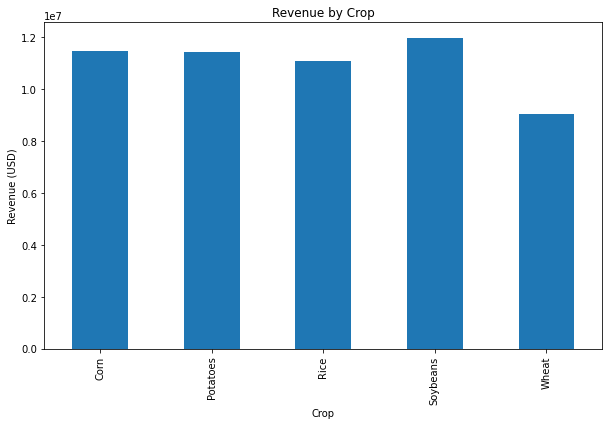

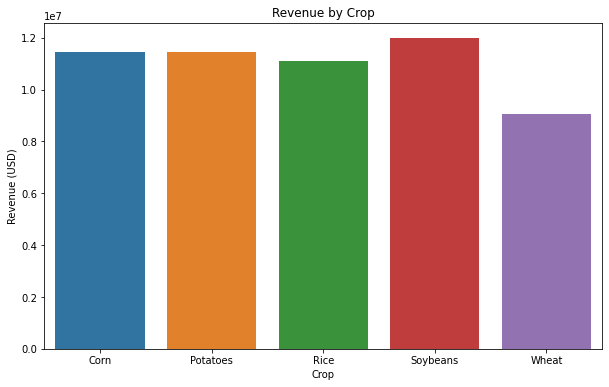

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate revenue by crops
revenue_by_crop = df3.groupby('Crop')['Quantity_Sold_Kg'].sum() * df3.groupby('Crop')['Price_per_Kg_USD'].mean()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
revenue_by_crop.plot(kind='bar')
plt.title('Revenue by Crop')
plt.xlabel('Crop')
plt.ylabel('Revenue (USD)')
plt.show()

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_crop.index, y=revenue_by_crop.values)
plt.title('Revenue by Crop')
plt.xlabel('Crop')
plt.ylabel('Revenue (USD)')
plt.show()

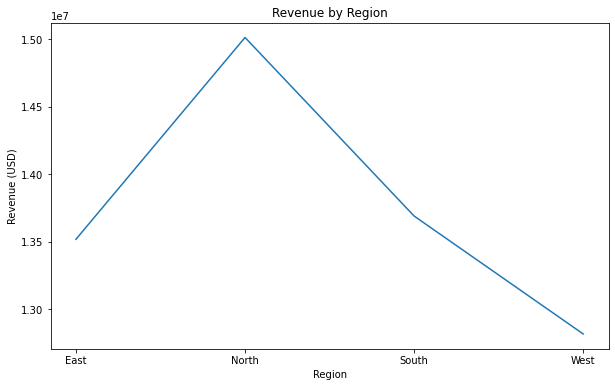

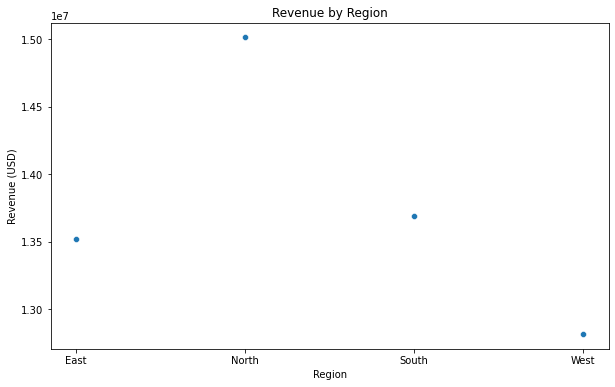

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate revenue by region
revenue_by_region = df3.groupby('Region')['Quantity_Sold_Kg'].sum() * df3.groupby('Region')['Price_per_Kg_USD'].mean()

# Create a line chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_region.index, revenue_by_region.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.show()

# Create a line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.show()